Описание проекта
данные сервиса для продажи недвижимости — архив объявлений
о продаже квартир в городе Н. задача — установить параметры, влияющие на
стоимость квартиры

In [70]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Шаг 1. Открытие данных.
Откройте данные, изучите их

In [71]:
df = pd.read_csv('datams.csv')
df.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition
0,13000000,108.0,3,2.70,16,51.000000,8,25.000000,16028.0,95
2,5196000,56.0,2,2.70,5,34.300000,4,8.300000,13933.0,558
3,64900000,159.0,3,2.70,14,84.324115,9,74.675885,6800.0,424
4,10000000,100.0,2,3.03,14,32.000000,13,41.000000,8098.0,121
7,7915000,71.6,2,2.70,24,37.972369,22,18.900000,11634.0,95


last_price — цена на момент снятия с публикации

total_area — площадь квартиры в квадратных метрах (м²)

rooms — число комнат

ceiling_height — высота потолков (м)

floors_total — всего этажей в доме

living_area — жилая площадь в квадратных метрах(м²)

floor — этаж

kitchen_area — площадь кухни в квадратных метрах (м²)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15591 entries, 0 to 23697
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           15591 non-null  int64  
 1   total_area           15591 non-null  float64
 2   rooms                15591 non-null  int64  
 3   ceiling_height       15591 non-null  float64
 4   floors_total         15591 non-null  int64  
 5   living_area          15591 non-null  float64
 6   floor                15591 non-null  int64  
 7   kitchen_area         15591 non-null  float64
 8   cityCenters_nearest  15591 non-null  float64
 9   days_exposition      15591 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.3 MB


In [73]:
df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition
count,1.559100e+04,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000
mean,8.034843e+06,64.650808,2.171766,2.766604,11.399654,36.946452,6.224681,12.532397,11588.493939,171.294016
std,1.299270e+07,40.230594,1.147103,1.045077,6.373357,24.973365,4.887168,10.167745,4832.354845,211.557615
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,181.000000,1.000000
25%,4.200000e+06,42.000000,1.000000,2.600000,5.000000,20.000000,3.000000,7.500000,8322.000000,47.000000
50%,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.040000,5.000000,10.000000,12242.000000,95.000000
75%,8.100000e+06,74.500000,3.000000,2.750000,16.000000,44.000000,8.000000,13.900000,14938.500000,200.000000
max,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,234.829828,29493.000000,1572.000000


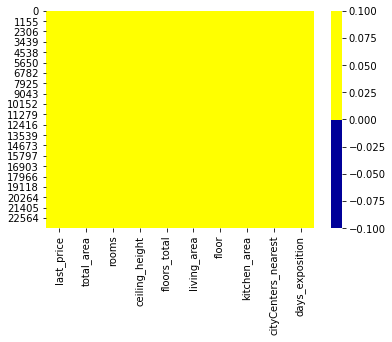

In [74]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - не пропущенные данные, синий - пропущенные данные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Шаг 2. Обработка данных.
1. Проверьте тип данных, при необходимости замените его на нужный.
2. Постройте гистограммы и график box-plot для каждого из признаков.
3. Удалите из выборки объявления, содержащие выбросы в каждом из признаков.

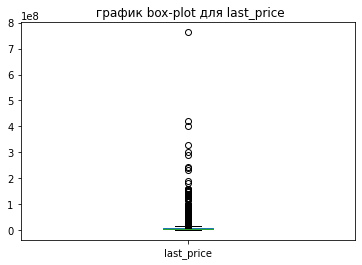

In [75]:
df.last_price.plot(kind='box',
                          title=' график box-plot для last_price')

In [76]:
a = max([0,df['last_price'].describe()['25%'] - 1.5 * (df['last_price'].describe()['75%'] -
df['last_price'].describe()['25%'])])
b = min([df['last_price'].describe()['max'],df['last_price'].describe()['75%'] + 1.5 *
(df['last_price'].describe()['75%'] - df['last_price'].describe()['25%'])])


df = df.query('@a <= last_price <= @b')
df.last_price.describe()




count    1.421600e+04
mean     5.950516e+06
std      2.487180e+06
min      1.219000e+04
25%      4.100000e+06
50%      5.250000e+06
75%      7.190000e+06
max      1.395000e+07
Name: last_price, dtype: float64

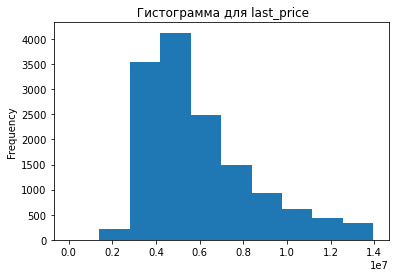

In [77]:
df.last_price.plot(kind='hist',
                          title=' Гистограмма для last_price')

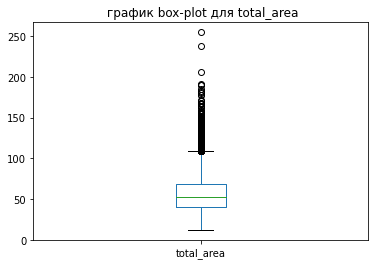

In [78]:
df.total_area.plot(kind='box',
                          title=' график box-plot для total_area')

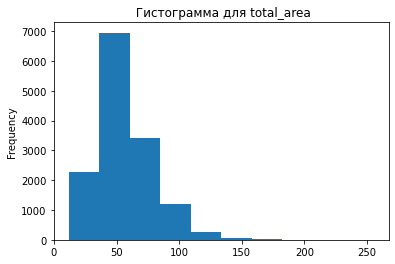

In [79]:
df.total_area.plot(kind='hist',
                          title=' Гистограмма для total_area')

In [80]:
a = max([0,df['total_area'].describe()['25%'] - 1.5 * (df['total_area'].describe()['75%'] -
df['total_area'].describe()['25%'])])
b = min([df['total_area'].describe()['max'],df['total_area'].describe()['75%'] + 1.5 *
(df['total_area'].describe()['75%'] - df['total_area'].describe()['25%'])])


df = df.query('@a <= total_area <= @b')
df.total_area.describe()

count    13837.000000
mean        54.671015
std         18.586510
min         12.000000
25%         40.120000
50%         51.000000
75%         66.000000
max        108.600000
Name: total_area, dtype: float64

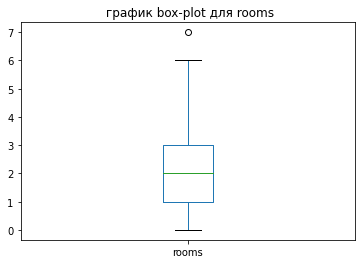

In [81]:
df.rooms.plot(kind='box',
                          title=' график box-plot для rooms')

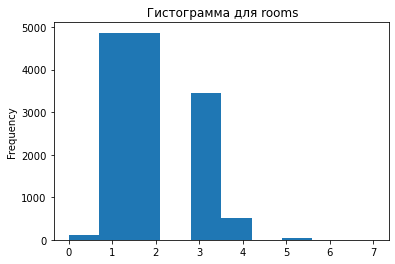

In [82]:
df.rooms.plot(kind='hist',
                          title=' Гистограмма для rooms')

In [84]:
a = max([0,df['rooms'].describe()['25%'] - 1.5 * (df['rooms'].describe()['75%'] -
df['rooms'].describe()['25%'])])
b = min([df['rooms'].describe()['max'],df['rooms'].describe()['75%'] + 1.5 *
(df['rooms'].describe()['75%'] - df['rooms'].describe()['25%'])])


df = df.query('@a <= rooms <= @b')
df.rooms.describe()

count    13836.000000
mean         1.967042
std          0.900828
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

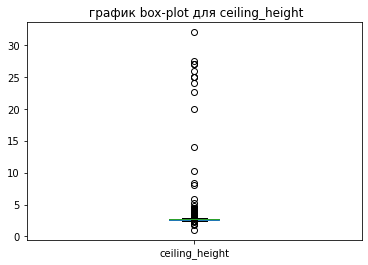

In [85]:
df.ceiling_height.plot(kind='box',
                          title=' график box-plot для ceiling_height')

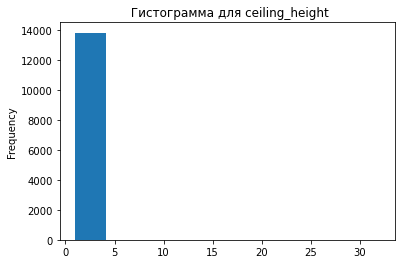

In [86]:
df.ceiling_height.plot(kind='hist',
                          title=' Гистограмма для ceiling_height')

In [87]:
a = max([0,df['ceiling_height'].describe()['25%'] - 1.5 * (df['ceiling_height'].describe()['75%'] -
df['ceiling_height'].describe()['25%'])])
b = min([df['ceiling_height'].describe()['max'],df['ceiling_height'].describe()['75%'] + 1.5 *
(df['ceiling_height'].describe()['75%'] - df['ceiling_height'].describe()['25%'])])


df = df.query('@a <= ceiling_height <= @b')
df.ceiling_height.describe()

count    12198.000000
mean         2.652464
std          0.091512
min          2.450000
25%          2.570000
50%          2.700000
75%          2.700000
max          2.850000
Name: ceiling_height, dtype: float64

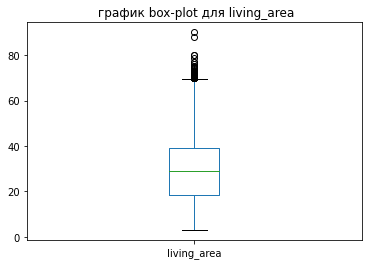

In [88]:
df.living_area.plot(kind='box',
                          title=' график box-plot для living_area')

In [89]:
a = max([0,df['living_area'].describe()['25%'] - 1.5 * (df['living_area'].describe()['75%'] -
df['living_area'].describe()['25%'])])
b = min([df['living_area'].describe()['max'],df['living_area'].describe()['75%'] + 1.5 *
(df['living_area'].describe()['75%'] - df['living_area'].describe()['25%'])])


df = df.query('@a <= living_area <= @b')
df.living_area.describe()

count    12159.000000
mean        29.862036
std         12.007895
min          3.000000
25%         18.500000
50%         29.000000
75%         38.714845
max         69.500000
Name: living_area, dtype: float64

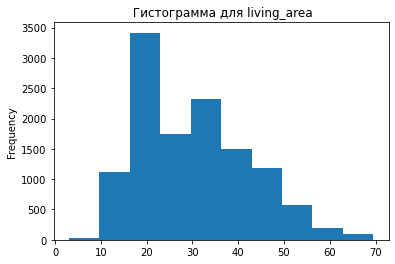

In [90]:
df.living_area.plot(kind='hist',
                          title=' Гистограмма для living_area')

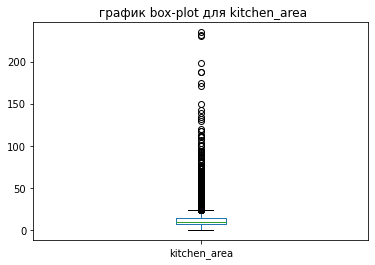

In [20]:
df.kitchen_area.plot(kind='box',
                          title=' график box-plot для kitchen_area')

In [91]:
a = max([0,df['kitchen_area'].describe()['25%'] - 1.5 * (df['kitchen_area'].describe()['75%'] -
df['kitchen_area'].describe()['25%'])])
b = min([df['kitchen_area'].describe()['max'],df['kitchen_area'].describe()['75%'] + 1.5 *
(df['kitchen_area'].describe()['75%'] - df['kitchen_area'].describe()['25%'])])


df = df.query('@a <= kitchen_area <= @b')
df.kitchen_area.describe()

count    11311.000000
mean         9.471613
std          3.176102
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.500000
Name: kitchen_area, dtype: float64

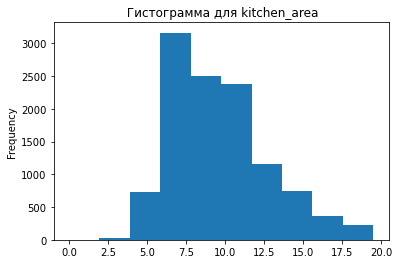

In [92]:
df.kitchen_area.plot(kind='hist',
                          title=' Гистограмма для kitchen_area')

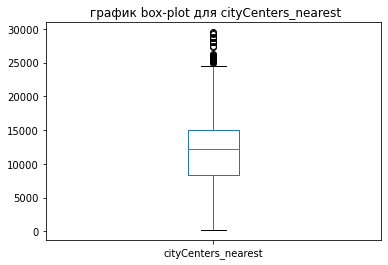

In [22]:
df.cityCenters_nearest.plot(kind='box',
                          title=' график box-plot для cityCenters_nearest')

In [93]:
a = max([0,df['cityCenters_nearest'].describe()['25%'] - 1.5 * (df['cityCenters_nearest'].describe()['75%'] -
df['cityCenters_nearest'].describe()['25%'])])
b = min([df['cityCenters_nearest'].describe()['max'],df['cityCenters_nearest'].describe()['75%'] + 1.5 *
(df['cityCenters_nearest'].describe()['75%'] - df['cityCenters_nearest'].describe()['25%'])])


df = df.query('@a <= cityCenters_nearest <= @b')
df.cityCenters_nearest.describe()

count    10782.000000
mean     12976.767947
std       3438.977370
min       4165.000000
25%      11093.000000
50%      13212.500000
75%      15358.500000
max      22175.000000
Name: cityCenters_nearest, dtype: float64

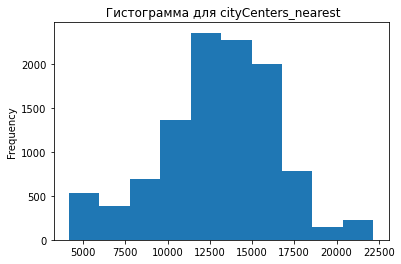

In [94]:
df.cityCenters_nearest.plot(kind='hist',
                          title=' Гистограмма для cityCenters_nearest')

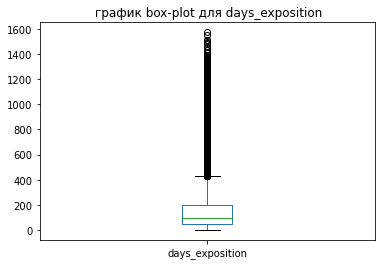

In [24]:
df.days_exposition.plot(kind='box',
                          title=' график box-plot для days_exposition')

In [95]:
a = max([0,df['days_exposition'].describe()['25%'] - 1.5 * (df['days_exposition'].describe()['75%'] -
df['days_exposition'].describe()['25%'])])
b = min([df['days_exposition'].describe()['max'],df['days_exposition'].describe()['75%'] + 1.5 *
(df['days_exposition'].describe()['75%'] - df['days_exposition'].describe()['25%'])])


df = df.query('@a <= days_exposition <= @b')
df.days_exposition.describe()

count    9695.000000
mean      102.432285
std        88.092048
min         1.000000
25%        37.000000
50%        88.000000
75%       135.000000
max       392.000000
Name: days_exposition, dtype: float64

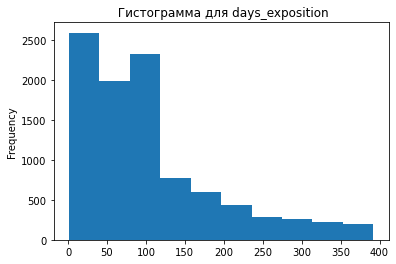

In [96]:
df.days_exposition.plot(kind='hist',
                          title=' Гистограмма для days_exposition')

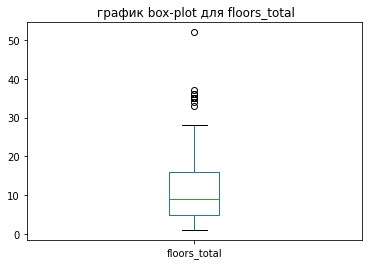

In [26]:
df.floors_total.plot(kind='box',
                          title=' график box-plot для floors_total')

In [97]:
a = max([0,df['floors_total'].describe()['25%'] - 1.5 * (df['floors_total'].describe()['75%'] -
df['floors_total'].describe()['25%'])])
b = min([df['floors_total'].describe()['max'],df['floors_total'].describe()['75%'] + 1.5 *
(df['floors_total'].describe()['75%'] - df['floors_total'].describe()['25%'])])


df = df.query('@a <= floors_total <= @b')
df.floors_total.describe()

count    9648.000000
mean       12.375933
std         6.105577
min         1.000000
25%         9.000000
50%        10.000000
75%        16.000000
max        26.000000
Name: floors_total, dtype: float64

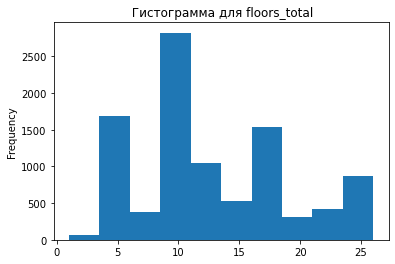

In [98]:
df.floors_total.plot(kind='hist',
                          title=' Гистограмма для floors_total')

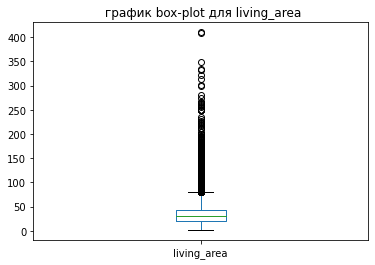

In [28]:
df.living_area.plot(kind='box',
                          title=' график box-plot для living_area')

In [99]:
a = max([0,df['living_area'].describe()['25%'] - 1.5 * (df['living_area'].describe()['75%'] -
df['living_area'].describe()['25%'])])
b = min([df['living_area'].describe()['max'],df['living_area'].describe()['75%'] + 1.5 *
(df['living_area'].describe()['75%'] - df['living_area'].describe()['25%'])])


df = df.query('@a <= living_area <= @b')
df.living_area.describe()

count    9637.000000
mean       29.244057
std        11.617589
min         3.000000
25%        18.200000
50%        28.400000
75%        37.800000
max        67.000000
Name: living_area, dtype: float64

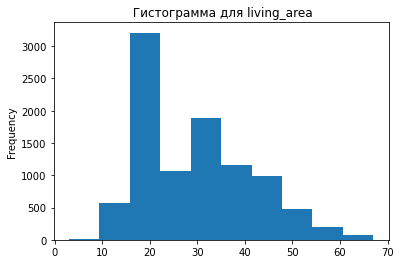

In [100]:
df.living_area.plot(kind='hist',
                          title=' Гистограмма для living_area')

Шаг 3. Посчитайте и добавьте в таблицу:
1. цену квадратного метра;
2. соотношение жилой и общей площади, а также отношение площади кухни к
общей.

In [106]:
df['m2sale'] = df['last_price']/df['total_area']
df.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,m2sale
7,7915000,71.6,2,2.70,24,37.972369,22,18.9,11634.0,95,110544.692737
9,5400000,61.0,3,2.50,9,43.600000,7,6.5,15008.0,289,88524.590164
10,5050000,39.6,1,2.67,12,20.300000,3,8.5,13878.0,137,127525.252525
15,4650000,39.0,1,2.70,14,20.500000,5,7.6,14259.0,19,119230.769231
18,3250000,31.0,1,2.50,5,19.400000,2,5.6,10842.0,168,104838.709677


In [107]:
df['total_living_area'] = df['living_area']/df['total_area']
df.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,m2sale,total_living_area
7,7915000,71.6,2,2.70,24,37.972369,22,18.9,11634.0,95,110544.692737,0.530340
9,5400000,61.0,3,2.50,9,43.600000,7,6.5,15008.0,289,88524.590164,0.714754
10,5050000,39.6,1,2.67,12,20.300000,3,8.5,13878.0,137,127525.252525,0.512626
15,4650000,39.0,1,2.70,14,20.500000,5,7.6,14259.0,19,119230.769231,0.525641
18,3250000,31.0,1,2.50,5,19.400000,2,5.6,10842.0,168,104838.709677,0.625806


In [108]:
df['total_kitcheng_area'] = df['kitchen_area']/df['total_area']
df.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,m2sale,total_living_area,total_kitcheng_area
7,7915000,71.6,2,2.70,24,37.972369,22,18.9,11634.0,95,110544.692737,0.530340,0.263966
9,5400000,61.0,3,2.50,9,43.600000,7,6.5,15008.0,289,88524.590164,0.714754,0.106557
10,5050000,39.6,1,2.67,12,20.300000,3,8.5,13878.0,137,127525.252525,0.512626,0.214646
15,4650000,39.0,1,2.70,14,20.500000,5,7.6,14259.0,19,119230.769231,0.525641,0.194872
18,3250000,31.0,1,2.50,5,19.400000,2,5.6,10842.0,168,104838.709677,0.625806,0.180645


Шаг 4. Ответьте на вопросы:
1. Опишите, сколько времени обычно занимает продажа. Когда можно считать, что
продажи прошли очень быстро, а когда необычно долго?
2. Какая высота потолков чаще всего встречается в объявлениях о продаже?
3. Какое типичное значение общей площади квартир?
4. Какое среднее значение стоимости квартир?
5. Влияет ли число комнат на общую площадь квартиры?
6. Какие признаки влияют на стоимость квартиры?

In [109]:
df.days_exposition.describe()


count    9637.000000
mean      102.398049
std        88.138950
min         1.000000
25%        37.000000
50%        88.000000
75%       135.000000
max       392.000000
Name: days_exposition, dtype: float64

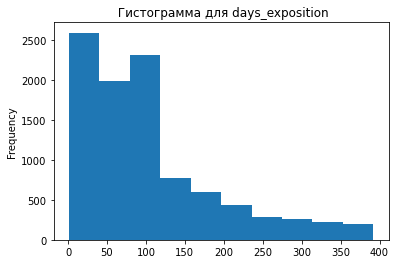

In [110]:
df.days_exposition.plot(kind='hist',
                          title=' Гистограмма для days_exposition')

По нашим статистическим данным и графику мы видим что в основном время продажи в пределах от 1 до 100-120. Для того что бы определить насколько время сделки анамально мы можем сравнить его с средним значение и взять +20 дней. Если время продажи выйдет за эти рамки то оно будет считаться аномальным 

In [111]:
df.ceiling_height.describe()

count    9637.000000
mean        2.646495
std         0.093228
min         2.450000
25%         2.550000
50%         2.700000
75%         2.700000
max         2.850000
Name: ceiling_height, dtype: float64

In [113]:
df.ceiling_height.mode()#значение которое встречается чаще всего в этом столбце, т.е.это и есть высота потолков, которая чаще всего встречается в объявлениях о продаже 

0    2.7
dtype: float64

In [114]:
df['total_area'].describe()

count    9637.000000
mean       51.134635
std        16.604522
min        13.200000
25%        38.600000
50%        46.800000
75%        61.000000
max       108.400000
Name: total_area, dtype: float64

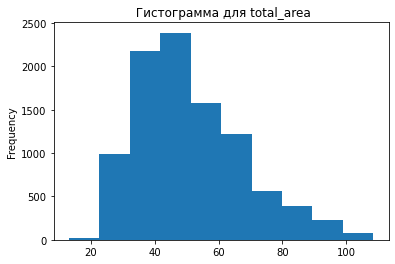

In [115]:
df.total_area.plot(kind='hist',
                          title=' Гистограмма для total_area')

In [116]:
df['total_area'].mode()

0    45.0
dtype: float64

По данным выше мы видим что средняя площядь квартиры равна  51.134635 , а чаще всего вречающаяся площадь 45.0, по графику действительно видно что данное значение самок модальное, поэтому будем считать что типичная площадь квартиры равна 45 м2

In [118]:
df['last_price'].describe()# здесь четко написано что средняя стоимость квартир равна (mean = 5.343125e+06)

count    9.637000e+03
mean     5.343125e+06
std      2.037088e+06
min      1.190000e+06
25%      3.900000e+06
50%      4.800000e+06
75%      6.240000e+06
max      1.390000e+07
Name: last_price, dtype: float64

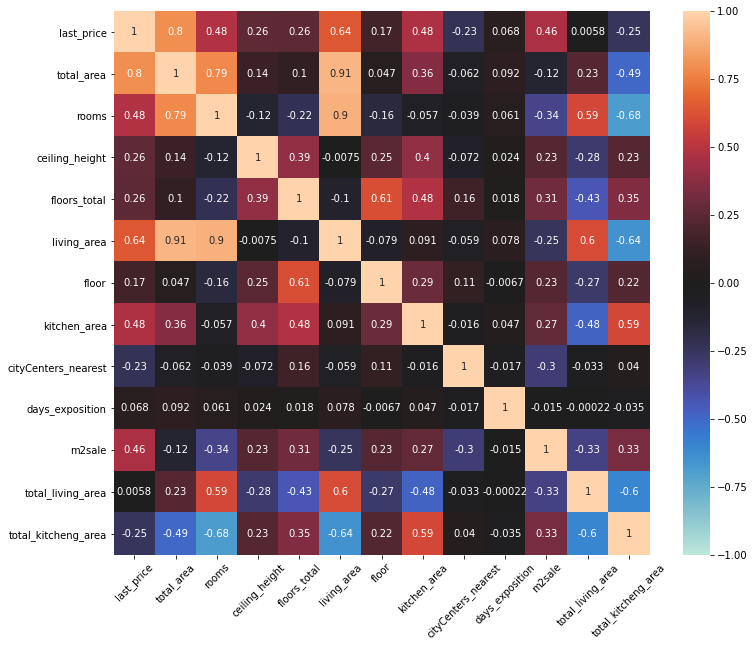

In [120]:
plt.figure(figsize=(12,10))
cor = df.corr()
ax = sns.heatmap(cor, 
                 annot=True, 
                 vmin=-1, 
                 vmax=1, 
                 center=0)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45)
plt.show()

Эта матрица показываем нам какие признаки влияют друг на друга по всей нашей таблице.

число комнат не сильно влияет на общую площадь квартиры коэф = 0,48

признаки влияющие на стоимость квартиры это  total_area living_area